In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from IPython.display import display


In [37]:
from sklearn.model_selection import train_test_split

In [56]:
bh_df = pd.read_csv('../processed_data/v3/BH_rf_impute.csv' , index_col='obs_id')
cv_df = pd.read_csv('../processed_data/v3/CV_rf_impute.csv' , index_col='obs_id')
ns_df = pd.read_csv('../processed_data/v3/NS_rf_impute.csv' , index_col='obs_id')
plsr_df = pd.read_csv('../processed_data/v3/PULSAR_rf_impute.csv' , index_col='obs_id')
data = pd.concat([bh_df , ns_df , cv_df , plsr_df] , axis=0)
data = data[data['class'].isin(['CV' , 'PULSAR' , 'NS' , 'BH'])]
data = data.replace('NS' , 'XRB')
data = data.replace('BH' , 'XRB')
#display(data)
data_label = data['class']
x = data.copy()
y = data_label.copy()
#id = x[['class' , 'src_n' , 'src_id' , 'significance']]
#x = x.drop(columns = ['class' , 'src_n' , 'src_id' , 'significance'])
#display(x , y)
x_train_all , x_test_all , y_train , y_test = train_test_split(x , y , test_size=0.2 , shuffle=True, random_state=10 , stratify=y)
info_col =  ['class' , 'src_n' , 'src_id' , 'significance']
x_train = x_train_all.drop(columns = info_col)
x_test = x_test_all.drop(columns = info_col)
id_train = x_train_all[info_col]
id_test = x_train_all[info_col]
classes = ['NS', 'BH' , 'CV' , 'PULSAR']
y_train = y_train.replace('XRB' , 0)
y_train = y_train.replace('BH' , 1)
y_train = y_train.replace('CV' , 1)
y_train = y_train.replace('PULSAR' , 2)
print(y_train)

obs_id
PULSAR_OBS_1      2
PULSAR_OBS_437    2
CV_OBS_537        1
CV_OBS_526        1
PULSAR_OBS_321    2
                 ..
NS_OBS_137        0
CV_OBS_395        1
PULSAR_OBS_307    2
PULSAR_OBS_434    2
NS_OBS_201        0
Name: class, Length: 1035, dtype: int64


In [57]:
one_hot_y_train =  to_categorical(y_train)

In [63]:
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.convolutional import Conv2D
#from tensorflow.keras.layers.pooling import MaxPooling2D
visible = layers.Input(shape=(56,1))
x = layers.BatchNormalization(axis=-1)(visible)
x = layers.Conv1D(32, kernel_size=4, activation='relu')(visible)
x = layers.MaxPool1D(pool_size=(2))(x)

x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPool1D(pool_size=(2))(x)

#x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=(2))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)
model_cnn = keras.Model(inputs=visible, outputs=output)
# summarize layers
#print(model_cnn.summary())
model_cnn.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics = ["accuracy"],
    )
history = model_cnn.fit(x_train, one_hot_y_train, batch_size=256, epochs=500, validation_split=0.2)

Epoch 1/500
4/4 [==============================] - 1s 96ms/step - loss: 1.4329 - accuracy: 0.3539 - val_loss: 1.2238 - val_accuracy: 0.3575
Epoch 2/500
4/4 [==============================] - 0s 17ms/step - loss: 1.1553 - accuracy: 0.4118 - val_loss: 1.1311 - val_accuracy: 0.3575
Epoch 3/500
4/4 [==============================] - 0s 18ms/step - loss: 1.1094 - accuracy: 0.4118 - val_loss: 1.1128 - val_accuracy: 0.3575
Epoch 4/500
4/4 [==============================] - 0s 20ms/step - loss: 1.0873 - accuracy: 0.4118 - val_loss: 1.1042 - val_accuracy: 0.3575
Epoch 5/500
4/4 [==============================] - 0s 18ms/step - loss: 1.0778 - accuracy: 0.4118 - val_loss: 1.1002 - val_accuracy: 0.3575
Epoch 6/500
4/4 [==============================] - 0s 18ms/step - loss: 1.0717 - accuracy: 0.4118 - val_loss: 1.0843 - val_accuracy: 0.3720
Epoch 7/500
4/4 [==============================] - 0s 19ms/step - loss: 1.0695 - accuracy: 0.3647 - val_loss: 1.0796 - val_accuracy: 0.3816
Epoch 8/500
4/4 [===

In [76]:
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.convolutional import Conv2D
#from tensorflow.keras.layers.pooling import MaxPooling2D
visible = layers.Input(shape=(56,))
#x = layers.BatchNormalization(axis=-1)(visible)

x = layers.Dense(32, activation='relu')(visible)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)
model_cnn = keras.Model(inputs=visible, outputs=output)
# summarize layers
#print(model_cnn.summary())
model_cnn.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics = ["accuracy"],
    )
history = model_cnn.fit(x_train, one_hot_y_train, batch_size=256, epochs=500, validation_split=0.2)

Epoch 1/500
4/4 [==============================] - 1s 84ms/step - loss: 1.1211 - accuracy: 0.4191 - val_loss: 1.0902 - val_accuracy: 0.4106
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 1.0920 - accuracy: 0.4432 - val_loss: 1.0899 - val_accuracy: 0.4203
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 1.0894 - accuracy: 0.4915 - val_loss: 1.0866 - val_accuracy: 0.4638
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 1.0867 - accuracy: 0.4903 - val_loss: 1.0826 - val_accuracy: 0.4251
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 1.0847 - accuracy: 0.4601 - val_loss: 1.0799 - val_accuracy: 0.4686
Epoch 6/500
4/4 [==============================] - 0s 13ms/step - loss: 1.0805 - accuracy: 0.5072 - val_loss: 1.0768 - val_accuracy: 0.4638
Epoch 7/500
4/4 [==============================] - 0s 15ms/step - loss: 1.0768 - accuracy: 0.5254 - val_loss: 1.0737 - val_accuracy: 0.4638
Epoch 8/500
4/4 [====

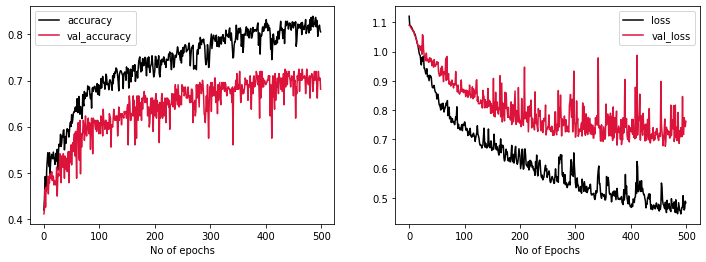

In [78]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/bn_model_level_0_rows.png')
plt.show()